##INTRODUCTION TO MACHINE LEARNING - PROJECT    
Sharvari Medhe(20D070073), Darshan Sinnarkar(20D070079), Nitesh(22M1089)  

Focused on developing a language detection model by training a classical ML from scratch and also using pretrained models for language translation. Created a basic Gradio GUI to demonstrate the working of the model.

Importing Essential Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

Loading Dataset

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/IML_Project/Language Detection.csv")
df1.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


Checking Null Values

In [4]:
df1.isnull().sum()

Text        0
Language    0
dtype: int64

In [5]:
df1["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Since the data in Hindi is very less, we will append some more examples

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/IML_Project/hindi.csv')

In [7]:
df = df1._append(df2,ignore_index=True)

In [8]:
df["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Hindi          781
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64

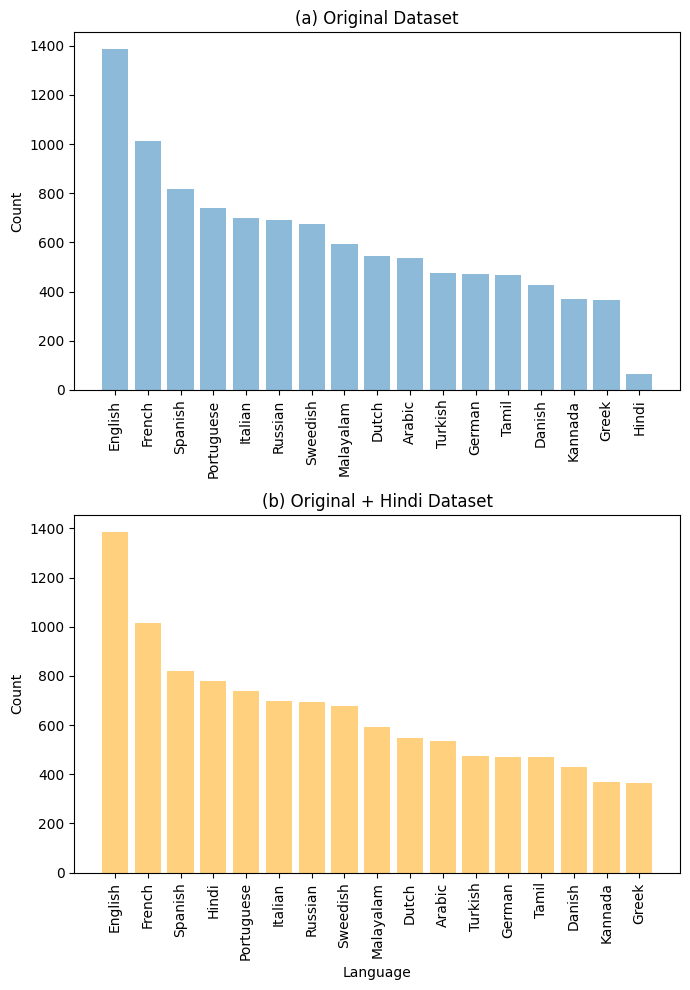

In [14]:
import matplotlib.pyplot as plt

languages1 = ['English', 'French', 'Spanish', 'Portuguese', 'Italian', 'Russian', 'Sweedish', 'Malayalam', 'Dutch', 'Arabic', 'Turkish', 'German', 'Tamil', 'Danish', 'Kannada', 'Greek', 'Hindi']
counts1 = [1385, 1014, 819, 739, 698, 692, 676, 594, 546, 536, 474, 470, 469, 428, 369, 365, 63]

languages2 = ['English', 'French', 'Spanish', 'Hindi', 'Portuguese', 'Italian', 'Russian', 'Sweedish', 'Malayalam', 'Dutch', 'Arabic', 'Turkish', 'German', 'Tamil', 'Danish', 'Kannada', 'Greek']
counts2 = [1385, 1014, 819, 781, 739, 698, 692, 676, 594, 546, 536, 474, 470, 469, 428, 369, 365]

# Plot the data
fig, axs = plt.subplots(2, 1, figsize=(7, 10))

axs[0].bar(languages1, counts1, alpha=0.5, label='Original Dataset')
axs[0].set_ylabel('Count')
axs[0].set_title('(a) Original Dataset')
axs[0].tick_params(axis='x', rotation=90)


axs[1].bar(languages2, counts2, alpha=0.5, label='Original + Hindi Dataset', color='orange')
axs[1].set_xlabel('Language')
axs[1].set_ylabel('Count')
axs[1].set_title('(b) Original + Hindi Dataset')
axs[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


Splitting the data in train test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42)
X_train.shape

(8844,)

TF-IDF Vectorizer  
TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. It works by multiplying two metrics: the term frequency and the inverse document frequency. This allows the vectorizer to assign higher weights to words that are more frequent within a document but rare across documents, effectively capturing the discriminative power of words in the corpus.

In [16]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
X_test_tfidf.shape

(2211, 37173)

In [21]:
X_train_tfidf.shape

(8844, 37173)

Saving the tokenizer as we will use it later for inferencing

In [23]:
import pickle

# Save the fitted TfidfVectorizer
with open('/content/drive/MyDrive/IML_Project/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

Trying different models to find the best model for our task

In [24]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Decision Trees": DecisionTreeClassifier()
}


In [25]:
# Train models and compare results
best_accuracy = 0
best_model = None

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)

    # Predict
    y_pred = model.predict(X_test_tfidf)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Compare with best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Training Random Forest...
Random Forest Accuracy: 0.932157394843962
              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       112
      Danish       0.88      0.89      0.88        81
       Dutch       0.96      0.90      0.93       116
     English       0.97      0.98      0.98       284
      French       0.98      0.94      0.96       216
      German       0.99      0.90      0.94        94
       Greek       1.00      0.89      0.94        73
       Hindi       1.00      1.00      1.00       150
     Italian       0.97      0.90      0.93       133
     Kannada       0.42      1.00      0.59        70
   Malayalam       1.00      0.95      0.97       119
  Portugeese       0.98      0.93      0.95       151
     Russian       1.00      0.90      0.95       137
     Spanish       0.92      0.95      0.94       152
    Sweedish       0.98      0.89      0.93       142
       Tamil       1.00      0.97      0.98        87
     Turkish 

In [26]:

print(f"Best model {best_model} saved with accuracy: {best_accuracy}")

Best model MultinomialNB() saved with accuracy: 0.9633649932157394


In [27]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [28]:
X_train_tfidf.shape

(8844, 37173)

In [29]:
X_test_tfidf.shape

(2211, 37173)

In [30]:
model.score(X_test_tfidf,y_test)

0.9633649932157394

In [31]:
y_pred = model.predict(X_test_tfidf)
print(y_pred)

['Hindi' 'Italian' 'Hindi' ... 'Tamil' 'Hindi' 'Greek']


In [32]:
cm = confusion_matrix(y_test, y_pred)

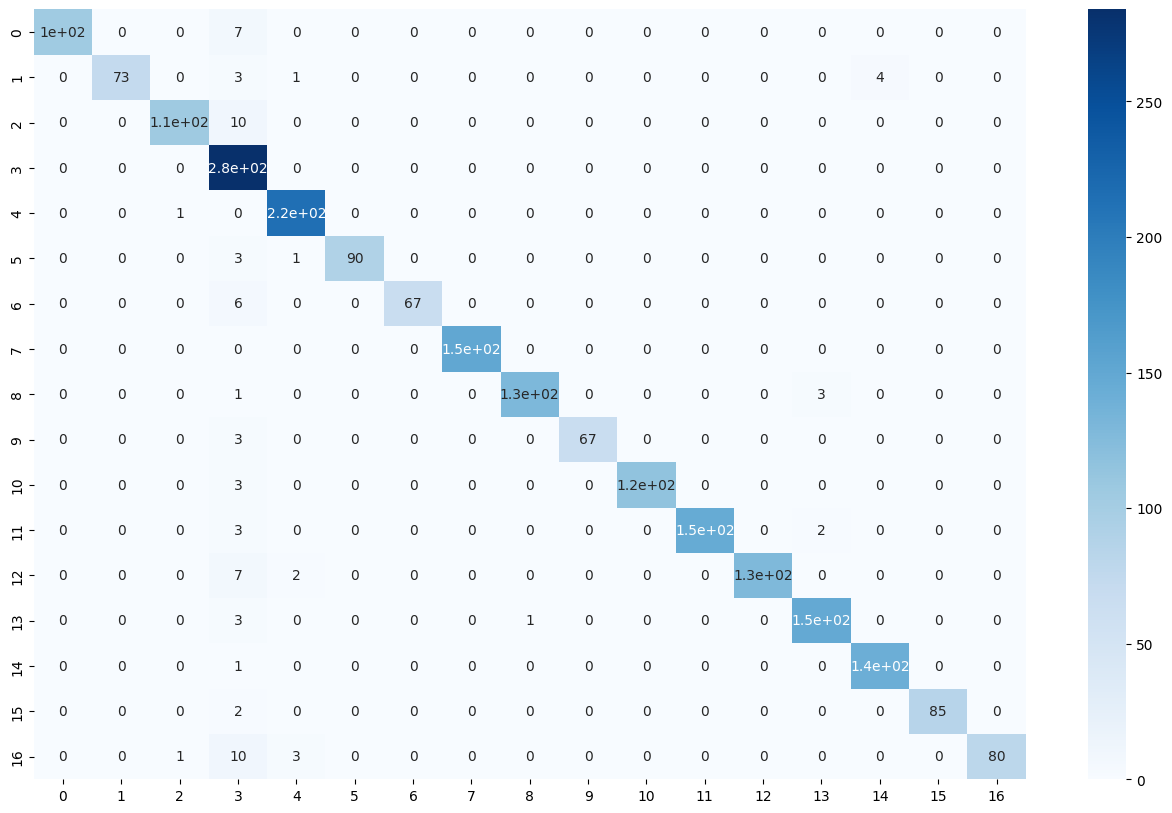

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot = True, cmap='Blues')
plt.show()

In [ ]:
# # Save the best model
with open('/content/drive/MyDrive/IML_Project/best_model_nb.pkl', 'wb') as f:
    pickle.dump(model, f)

Building translation pipeline using pre-trained translation models from HuggingFace Library

In [ ]:
!pip install transformers ipywidgets gradio --upgrade

In [ ]:
import gradio as gr
from transformers import pipeline

In [ ]:
src_lang = input("Enter the source language \n")

Enter the source language 
en


In [ ]:
tgt_lang = input("Enter target language \n")

Enter target language 
de


In [ ]:
func = f'translation_{src_lang}_to_{tgt_lang}'
func

'translation_en_to_de'

In [ ]:
model= f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
model

'Helsinki-NLP/opus-mt-en-de'

In [ ]:
!pip install sacremoses

Creating the pipeline with translation functionality

In [ ]:
translation_pipeline = pipeline(func, model)

In [ ]:
user_text = input("Enter text to translate \n")
print(type(user_text))

Enter text to translate 
ih
<class 'str'>


In [ ]:
translated_text = translation_pipeline(user_text)

In [ ]:
print("Translated text:", translated_text[0]['translation_text'])

Translated text: Ich bin


In [ ]:
!pip install iso-639

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=b98286fb9ab2241fdd83f73bf0070ec8c9974ad1384642fff1d32bd8f0716ed2
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [ ]:
from iso639 import languages

def language_name_to_code(language_name):
    """Code to convert the detected language into it's ISO standard code

    Args:
        language_name (str): the detected language by the Naive Bayes Pre-trained model

    Returns:
        str: the two lettered ISO standard code of the detected language
    """
    language_code = None
    for lang in languages.part1:
        if languages.part1[lang].name.lower() == language_name.lower():
            language_code = languages.part1[lang].alpha2
            break

    if language_code is None:
        for lang in languages.part2:
            if languages.part2[lang].name.lower() == language_name.lower():
                language_code = languages.part2[lang].alpha2
                break

    return language_code


In [ ]:
def lang_detect(user_text):
      """ detect the language of the user query

    Args:
        user_text (str): new user query

    Returns:
        detected_lang (str): ISO Code for the detected language
    """
    with open('/content/drive/MyDrive/IML_Project/best_model_nb.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('/content/drive/MyDrive/IML_Project/tfidf_vectorizer.pkl', 'rb') as f:
        tfidf_vectorizer = pickle.load(f)

    msg = [user_text]
    msg_tfidf = tfidf_vectorizer.transform(msg)
    src_lang = model.predict(msg_tfidf)
    # print(src_lang)

    detected_lang = language_name_to_code(src_lang.item())
    return detected_lang

In [ ]:
temp = lang_detect("Ich bin")

In [ ]:
def translate_transformer(user_text,detected_lang, tgt_lang):
    """function to streamline the process of language detection and translation

    Args:
        user_text (str): query given by the user
        tgt_lang (str) : ISO code of the language, the user wants the translation to

    Returns:
        str: translated text
    """
    tgt_lang = language_name_to_code(tgt_lang)
    func = f'translation_{detected_lang}_to_{tgt_lang}'
    model= f'Helsinki-NLP/opus-mt-{detected_lang}-{tgt_lang}'
    translation_pipeline = pipeline(func, model)
    translated_text = translation_pipeline(user_text)
    return translated_text[0]['translation_text']

In [ ]:
translate_transformer("Ich Bin",temp, "english")

'I am'

Building the Basic GUI using Gradio

In [ ]:
# # Define the input component (e.g., Textbox)
# user_text = gr.components.Textbox(lines=2, placeholder="Text to translate")
# source = gr.components.Textbox(lines=2, placeholder="Source Language")
# target = gr.components.Textbox(lines=2, placeholder="Target Language")

# # Define the output component (e.g., Textbox)
# output_component = gr.components.Label()

# interface = gr.Interface(fn = translate_transformer,
#                          inputs = [user_text,source, target],
#                          outputs = output_component)

# interface.launch()

In [ ]:
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    with gr.Tabs():
        with gr.TabItem("Language Detection and Translation"):
          # Define the input component (e.g., Textbox)
            user_text = gr.components.Textbox(lines=2, placeholder="Text to translate", label = "User Text")
            text_submit_btn = gr.Button(value="Submit")
            detect_lang = gr.components.Label(label = "Detected Language is")
            txt_msg = user_text.submit(fn=lang_detect,
                                       inputs = user_text,
                                       outputs = detect_lang,
                                       queue=False).then(lambda: gr.Textbox(interactive=True),
                                                         None, [user_text], queue=False)
            txt_msg = text_submit_btn.click(fn=lang_detect,
                                            inputs = user_text,
                                            outputs =detect_lang,
                                            queue=False).then(lambda: gr.Textbox(interactive=True),
                                                              None, [user_text], queue=False)

            target = gr.components.Textbox(lines=2, label ="To")
            # Define the output component (e.g., Textbox)
            text_submit_btn = gr.Button(value="Submit")
            output_component = gr.components.Label(label = "Output")

            txt_msg = user_text.submit(fn=translate_transformer,
                                       inputs = [user_text, detect_lang, target],
                                       outputs = output_component,
                                       queue=False).then(lambda: gr.Textbox(interactive=True),
                                                         None, [user_text], queue=False)
            txt_msg = text_submit_btn.click(fn=translate_transformer,
                                            inputs = [user_text, detect_lang, target],
                                            outputs = output_component,
                                            queue=False).then(lambda: gr.Textbox(interactive=True),
                                                              None, [user_text], queue=False)


In [ ]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ed8031a78800765d1b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
